In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [10]:
df = pd.read_csv('updated_bankchurners.csv')

##### <b>Business Question</b>: A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

# Preprocessing our dataset

In [11]:
df.shape

(10127, 21)

In [12]:
df.head(25)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [14]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [15]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Exploratory Data Anaylsis

<AxesSubplot:>

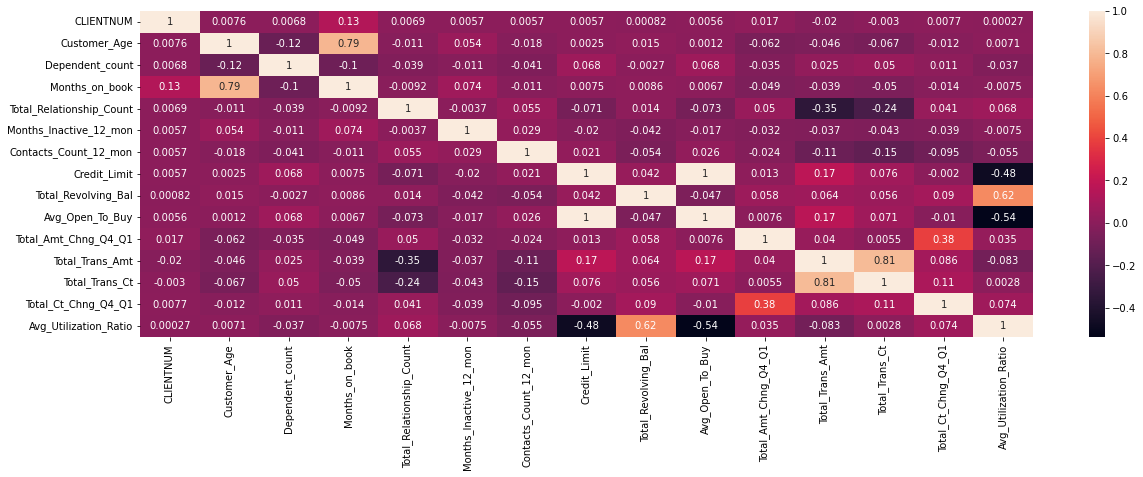

In [16]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True)

- Credit_limit correlates with Avg_open_to_buy (high correlated = 1)
- Multicoliniarity - where your X's are highly correlated with each other, we want it to the Y's and X's to correlated
- Toal_revolving_balance correlates with Avg_utilization_ratio (highly correlated = 0.62)
- Custormers_age correlates with Month's_on_book (highly correlated = 0.72)

#### <b>Hypothesis</b>
<b>Our Goal here is to find attrition, so we want to find the best model to predict the attrition.</b>
<b>Is the customer more likely to leave the bank? Or are they more likely to stay?</b>

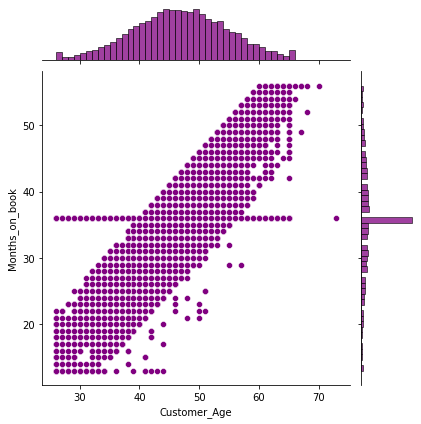

In [17]:
sns.jointplot(x='Customer_Age', y='Months_on_book', data=df, color='purple')

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_on_book'>

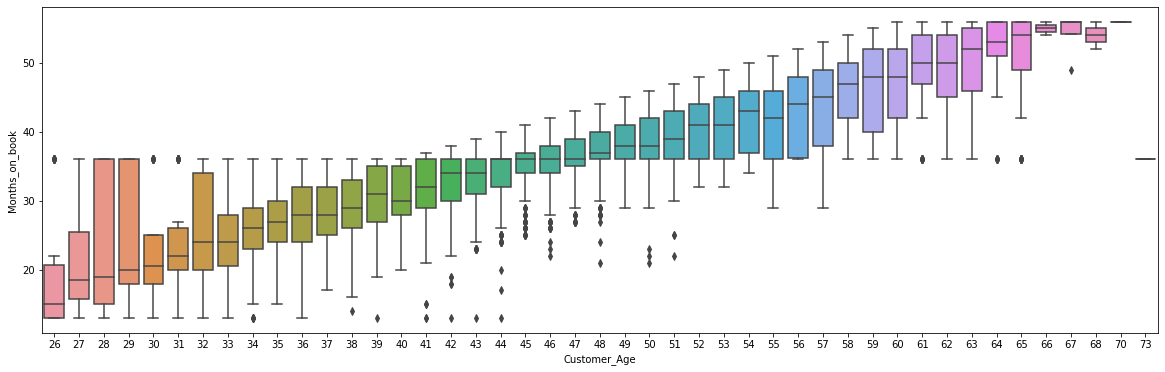

In [18]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='Customer_Age', y='Months_on_book')

As we can see from this boxplot, we can see that a customer's age affects the longevity of their account.
- The older a customer the older the account they have.
- The younger a customer the younger their account.

We can't assume that a customer is more likely to leave the bank if they are younger.

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

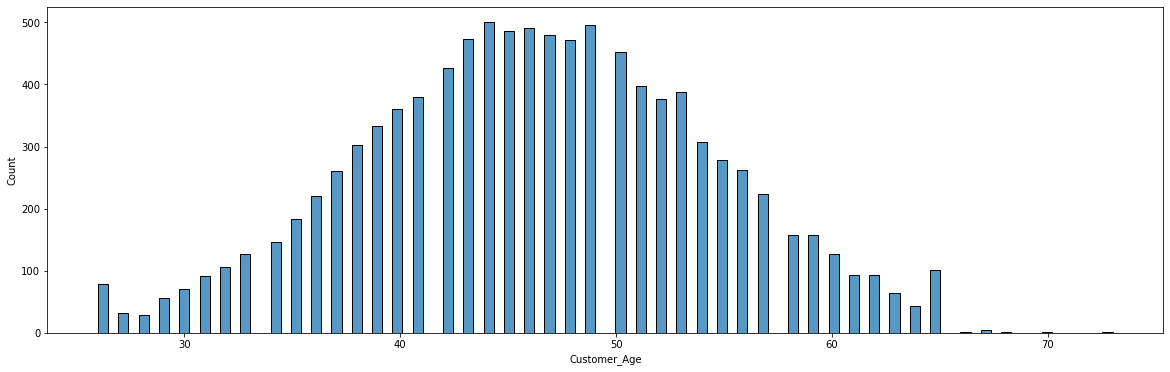

In [19]:
plt.figure(figsize=(20,6))
sns.histplot(df['Customer_Age'], kde=False, bins=100)

We can see that the customer's age is a normal distribution.
There is a larger density of middle aged customers.

Due to the fact that the customer's age is a normal distribution, we can assume that the customer is more likely to leave the bank if they are younger.

### Now we want to drop our uneccesary columns and create our X and Y.

- We want to drop Clientnum, since it is not a predictive variable.
- We want to drop attrition_flag, since we are trying to predict it.

In [20]:
df.drop(['CLIENTNUM'], axis=1, inplace=True)

### We want to One-Hot-Encode the column: Attrition_Flag

In [21]:
df['Attrition_Flag'] = pd.get_dummies(data= df['Attrition_Flag'], drop_first=True)

In [22]:
df['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [23]:
df['Gender'] = pd.get_dummies(data= df['Gender'], drop_first=True)

In [24]:
df['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [25]:
df.drop(['Marital_Status', 'Education_Level', 'Income_Category', 'Card_Category'], axis=1, inplace=True)

In [26]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Train Test Split

In [27]:
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag'].values

In [28]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [30]:
X_train

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5500,45,0,4,37,4,2,1,3241.0,0,3241.0,0.629,4992,80,0.739,0.000
5957,38,1,1,28,4,5,2,1690.0,1459,231.0,0.667,3928,69,0.643,0.863
6475,55,0,2,36,3,3,2,1886.0,1023,863.0,0.708,4233,81,0.884,0.542
1520,32,1,1,27,5,3,3,10029.0,606,9423.0,0.727,2192,58,0.657,0.060
9960,40,0,1,34,5,2,2,13669.0,1774,11895.0,0.653,15772,130,0.625,0.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,57,1,2,36,3,2,2,23700.0,1314,22386.0,1.487,1644,28,0.647,0.055
5695,49,0,2,38,6,3,3,5076.0,871,4205.0,0.693,4115,72,0.600,0.172
8006,58,0,5,47,1,3,3,2038.0,1099,939.0,0.809,4784,70,0.750,0.539
1361,59,1,0,53,3,2,3,4241.0,0,4241.0,0.607,1798,45,0.731,0.000


# Scaling our Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(X_train)

MinMaxScaler()

In [34]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### We will try a Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [39]:
predictions = dtree.predict(X_test)

In [40]:
predictions

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

## Predictions and Evaluation of Decision Tree

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       656
           1       0.96      0.96      0.96      3395

    accuracy                           0.94      4051
   macro avg       0.88      0.89      0.88      4051
weighted avg       0.94      0.94      0.94      4051



In [43]:
print(confusion_matrix(y_test,predictions))

[[ 532  124]
 [ 131 3264]]


## Training the Random Forest model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=600)

In [46]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation of Random Forest Model

In [47]:
pred = rfc.predict(X_test)

In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       656
           1       0.97      0.99      0.98      3395

    accuracy                           0.96      4051
   macro avg       0.94      0.91      0.92      4051
weighted avg       0.96      0.96      0.96      4051



In [49]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [50]:
print(confusion_matrix(y_test,pred))

[[ 542  114]
 [  47 3348]]


# Running a Deep Learning model

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Sequential Model

In [52]:
model = Sequential()

model.add(Dense(units=128,activation='relu'))

model.add(Dense(units=64,activation='relu'))

model.add(Dense(units=32,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

## Functional API

In [53]:
# input = tf.keras.layers.Input(shape=(15,))
# layers = tf.keras.layers.Dense(256, activation='relu')(input)
# layers = tf.keras.layers.Dense(256, activation='relu')(layers)
# layers = tf.keras.layers.Dense(128, activation='relu')(layers)
# output = tf.keras.layers.Dense(1, activation='sigmoid')(layers)

# model = tf.keras.Model(input, output)

Now we will try to run a deep learning model.

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=60,
          batch_size=512,
          )

2022-04-11 21:57:10.143965: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 21:57:10.144774: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


Train on 6076 samples, validate on 4051 samples
Epoch 1/60
6076/6076 [==============================] - 1s 160us/sample - loss: 0.6132 - val_loss: 0.5100
Epoch 2/60
6076/6076 [==============================] - 0s 39us/sample - loss: 0.4501 - val_loss: 0.4140
Epoch 3/60
6076/6076 [==============================] - 0s 41us/sample - loss: 0.4078 - val_loss: 0.4007
Epoch 4/60
6076/6076 [==============================] - 0s 39us/sample - loss: 0.3833 - val_loss: 0.3731
Epoch 5/60
6076/6076 [==============================] - 0s 43us/sample - loss: 0.3560 - val_loss: 0.3436
Epoch 6/60
6076/6076 [==============================] - 0s 38us/sample - loss: 0.3275 - val_loss: 0.3171
Epoch 7/60
6076/6076 [==============================] - 0s 36us/sample - loss: 0.3058 - val_loss: 0.2949
Epoch 8/60
6076/6076 [==============================] - 0s 38us/sample - loss: 0.2874 - val_loss: 0.2765
Epoch 9/60
6076/6076 [==============================] - 0s 40us/sample - loss: 0.2740 - val_loss: 0.2654
Epoch 

In [61]:
losses = pd.DataFrame(model.history.history)

(0.0, 40.0)

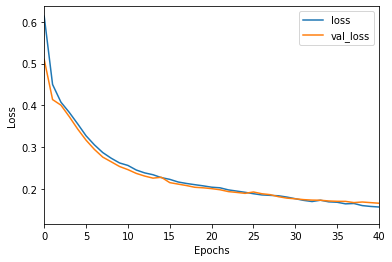

In [62]:
losses.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, 40)

In [63]:
pred1 = model.predict_classes(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       656
           1       0.96      0.97      0.96      3395

    accuracy                           0.94      4051
   macro avg       0.90      0.88      0.89      4051
weighted avg       0.94      0.94      0.94      4051



In [66]:
print(confusion_matrix(y_test,pred1))

[[ 519  137]
 [ 105 3290]]
